# Comparisson between different methods for detecting outflows and studying their energetic properties

In the literature, many methods have been implemented for estimating the portion of outflowing wind when analysing emission lines within long-slit spectra. 
As a brief explanation for the nuclear long-slit spectra of the 19-type II QSOs (quasars), the emission lines commonly present narrow components that can be associated with the rotating gas clouds of the NLR (narrow line region) of their central AGN (active galactic nuclei). But, since in type-II QSOs the BLR of the AGN is obscured, emission lines do not present broad components from such region. The broad and shifted components present in their emission lines are a result of outflowing winds of gas.

Taking this into account, for studying the ionized outflows of these type II quasars the usual approach is based on parametrically modelling the profiles of the [OIII] emission lines using multiple Gaussian components, identifying the intermediante and broad components (with velocities higher than the ones associated with the gas from the NLR, around 600 km/s) as outflows of gas.

Another, way recent, procedure is to perform a non-parametric analysis for characteizing the [OIII]5007 emission line profile. Within such model, the broad underlying wings are the ones identified as the outflows, since they correspond to the ‘maximum’ projected velocity of the gas. Habitually, the outflow from the red side of the emission line is taken till the 5th of the flux contained in the overall emission-line profile, while the blue component is selected from the 95th onwards.

Latterly, Speranza et al. 2022, also suggested another method for identifying the outflowing winds within AGN emission lines. In each emission line, the comovil rotating gas can be considered as the inner region of the emission line from its peak down to one-third of the height of the peak. The more disrupted remaining wing of the line is the one that can be associated with the outflow. However, in order to get rid of the simmetric part of the emission line, a mirror of the non-prominent wing should be sustracted from the prominent wing. The leftover would be the outflowing gas of the QSOs.

###### Here, in these short notebook, we compare the results obtained for our sample from these three different methods. We have decided to focus on the outflow mass rate and the kinetic power derived from the detected outflows, since are the most robust parameters.

In [1]:
import numpy as np
from astropy.io import ascii
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
# Import the data from the parametric and the non-parametric analysis
speranza = ascii.read('../kinematic_analysis/Tables/outflow_energy_giovanna.txt').to_pandas()
nonpar = ascii.read('../kinematic_analysis/Tables/outflow_energy_nonpar.txt').to_pandas()
par = ascii.read('../kinematic_analysis/Tables/outflow_energy_par.txt').to_pandas()

In [3]:
speranza

,Name,LogMof,eLogMof,LogEkin,eLogEkin,Rout,eRout,LogE.kin,eLogE.kin,M.of,eM.of
0,J0025-10,5.17,0.01700,53.7,0.01940,1.0,0.0,35.5,0.0222,0.2690,0.0107
1,J0114+00,5.29,0.26900,54.5,0.30700,1.0,0.0,36.6,0.3450,0.7410,0.4550
2,J0123+00,5.39,0.01880,54.0,0.02330,1.0,0.0,35.7,0.0282,0.4660,0.0212
3,J0142+14,5.92,0.10200,54.9,0.10300,1.0,0.0,36.8,0.1050,2.3700,0.4940
4,J0217-00,5.28,0.06600,54.4,0.07240,1.0,0.0,36.4,0.0780,0.6610,0.1020
5,J0217-01,4.53,0.22000,53.1,0.74400,1.0,0.0,35.0,1.0900,0.0549,0.0525
6,J0218-00,5.25,0.01680,53.7,0.05180,1.0,0.0,35.4,0.0741,0.2850,0.0204
7,J0227+01,5.00,0.03660,53.7,0.04600,1.0,0.0,35.5,0.0558,0.2050,0.0185
8,J0234-07,5.62,0.00557,54.3,0.00851,1.0,0.0,36.2,0.0109,0.9030,0.0136
9,J0249+00,5.62,0.01970,54.6,0.03830,1.0,0.0,36.5,0.0527,1.2100,0.0723


In [4]:
nonpar

,Name,LogMof,eLogMof,LogEkin,eLogEkin,Rout,eRout,LogE.kin,eLogE.kin,M.of,eM.of
0,J0025-10,5.51,0.004250,54.2,0.0109,1.0,0.0,36.0,0.01660,0.658,0.00952
1,J0114+00,5.81,0.007890,54.8,0.1100,1.0,0.0,36.8,0.18200,1.770,0.18900
2,J0123+00,5.62,0.005720,54.3,0.0197,1.0,0.0,36.1,0.03200,0.816,0.01850
3,J0142+14,6.27,0.004430,55.4,0.0201,1.0,0.0,37.5,0.02950,6.580,0.16500
4,J0217-00,5.49,0.003930,54.6,0.0189,1.0,0.0,36.6,0.02850,1.040,0.02440
5,J0217-01,5.26,0.004900,54.2,0.1100,1.0,0.0,36.2,0.16600,0.540,0.06710
6,J0218-00,5.60,0.000827,54.0,0.0477,1.0,0.0,35.7,0.07590,0.588,0.03030
7,J0227+01,5.41,0.005060,54.1,0.0148,1.0,0.0,35.9,0.02210,0.526,0.01030
8,J0234-07,5.52,0.002690,54.5,0.0049,1.0,0.0,36.5,0.00715,0.943,0.00701
9,J0249+00,5.84,0.002520,55.0,0.0483,1.0,0.0,37.1,0.08020,2.360,0.11100


In [5]:
par

,Name,LogMof,eLogMof,LogEkin,eLogEkin,Rout,eRout,LogE.kin,eLogE.kin,M.of,eM.of
0,J0025-10,5.56,0.1230,52.2,0.3890,1.0,0.0,33.1,0.5720,0.0776,0.0334
1,J0114+00,6.09,0.1360,54.5,0.3910,1.0,0.0,36.2,0.5630,1.8900,0.9680
2,J0123+00,5.82,0.1310,53.1,0.2190,1.0,0.0,34.3,0.2920,0.2880,0.0925
3,J0142+14,7.05,0.0379,53.9,0.1680,1.0,0.0,34.8,0.2470,2.8900,0.5860
4,J0217-00,6.24,0.0433,54.2,0.0942,1.0,0.0,35.6,0.1360,1.5700,0.2060
5,J0217-01,5.89,0.3830,53.0,1.0400,1.0,0.0,34.1,1.5300,0.2490,0.3660
6,J0227+01,5.78,0.0870,53.0,0.1900,1.0,0.0,34.1,0.2660,0.2340,0.0659
7,J0234-07,6.08,0.0123,53.6,0.0205,1.0,0.0,34.9,0.0275,0.6950,0.0236
8,J0249+00,6.48,0.0256,54.6,0.1900,1.0,0.0,36.6,0.2700,1.9800,0.4320
9,J0320+00,5.80,0.4360,52.4,1.1600,1.0,0.0,33.2,1.6700,0.0699,0.1660


In [6]:
aux_nonpar_0 = nonpar.drop(nonpar[(nonpar['Name']=='J0218-00')].index)
aux_nonpar = aux_nonpar_0.drop(aux_nonpar_0[(aux_nonpar_0['Name']=='J0334+00')].index)
aux_spe_0 = speranza.drop(speranza[(nonpar['Name']=='J0218-00')].index)
aux_spe = aux_spe_0.drop(aux_spe_0[(aux_nonpar_0['Name']=='J0334+00')].index)

### Comparisson of the outflow mass rate and kinetic energy from each method

#### Histograms

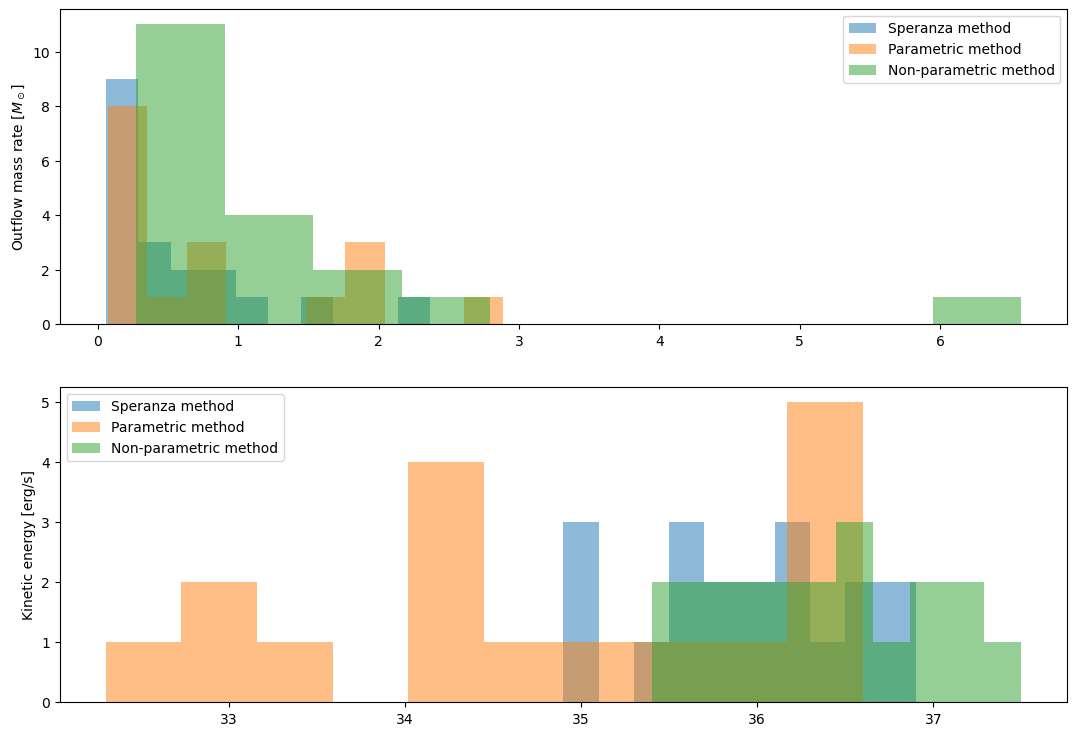

In [7]:
f,(ax1,ax2) = plt.subplots(2,1,figsize=(13,9))
ax1.hist(speranza['M.of'],alpha=0.5,label ='Speranza method')
ax1.hist(par['M.of'],alpha=0.5,label ='Parametric method')
ax1.hist(nonpar['M.of'],alpha=0.5,label ='Non-parametric method')
ax1.set_ylabel(r'Outflow mass rate [$M_\odot$]')
ax1.legend()

ax2.hist(speranza['LogE.kin'],alpha=0.5,label ='Speranza method')
ax2.hist(par['LogE.kin'],alpha=0.5,label ='Parametric method')
ax2.hist(nonpar['LogE.kin'],alpha=0.5,label ='Non-parametric method')
ax2.set_ylabel(r'Kinetic energy [erg/s]')
ax2.legend()

By comparing the distributions of the outflow mass rates and the kinetic power derived with each method, we can conclude that the non parametric method provides higher values of both properties within our sample.

In [8]:
mean_values = pd.DataFrame(data={'Method':['Speranza','NonParametric','Parametric'],\
                                 'OutflowMassRate (M.of)':[speranza['M.of'].mean(),nonpar['M.of'].mean(),par['M.of'].mean()],\
                                 'KineticEnergy (LogE.kin)':[speranza['LogE.kin'].mean(),nonpar['LogE.kin'].mean(),par['LogE.kin'].mean()]})

In [9]:
mean_values

,Method,OutflowMassRate (M.of),KineticEnergy (LogE.kin)
0,Speranza,0.594505,35.873684
1,NonParametric,1.232842,36.378947
2,Parametric,0.843447,34.770588


#### Graphs

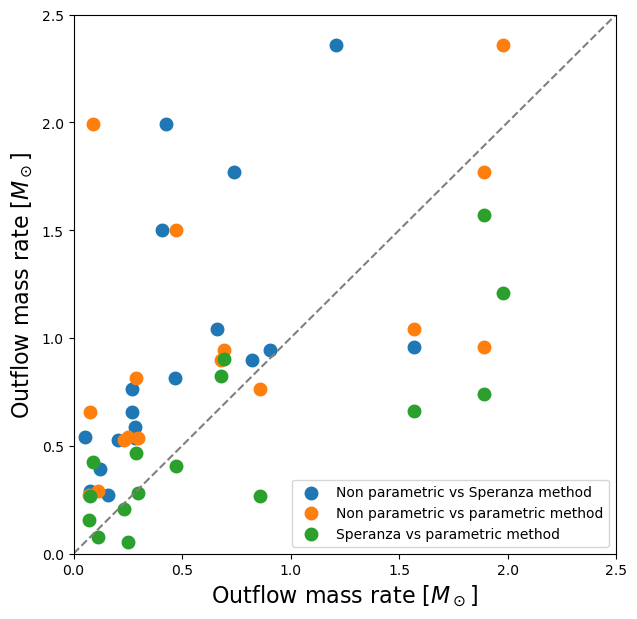

In [10]:
f,ax1 = plt.subplots(1,1,figsize=(7,7))
ax1.scatter(speranza['M.of'],nonpar['M.of'],linewidths=4,label='Non parametric vs Speranza method')
ax1.scatter(par['M.of'],aux_nonpar['M.of'],linewidths=4,label='Non parametric vs parametric method')
ax1.scatter(par['M.of'],aux_spe['M.of'],linewidths=4,label='Speranza vs parametric method')
ax1.plot([0,3],[0,3],linestyle='--',color='gray')
ax1.set_xlim(0,2.5)
ax1.set_ylim(0,2.5)
ax1.set_xlabel(r'Outflow mass rate [$M_\odot$]',fontsize=16)
ax1.set_ylabel(r'Outflow mass rate [$M_\odot$]',fontsize=16)
ax1.legend(fontsize=10)

Text(0, 0.5, 'Speranza method: outflow mass rate [$M_\\odot$]')

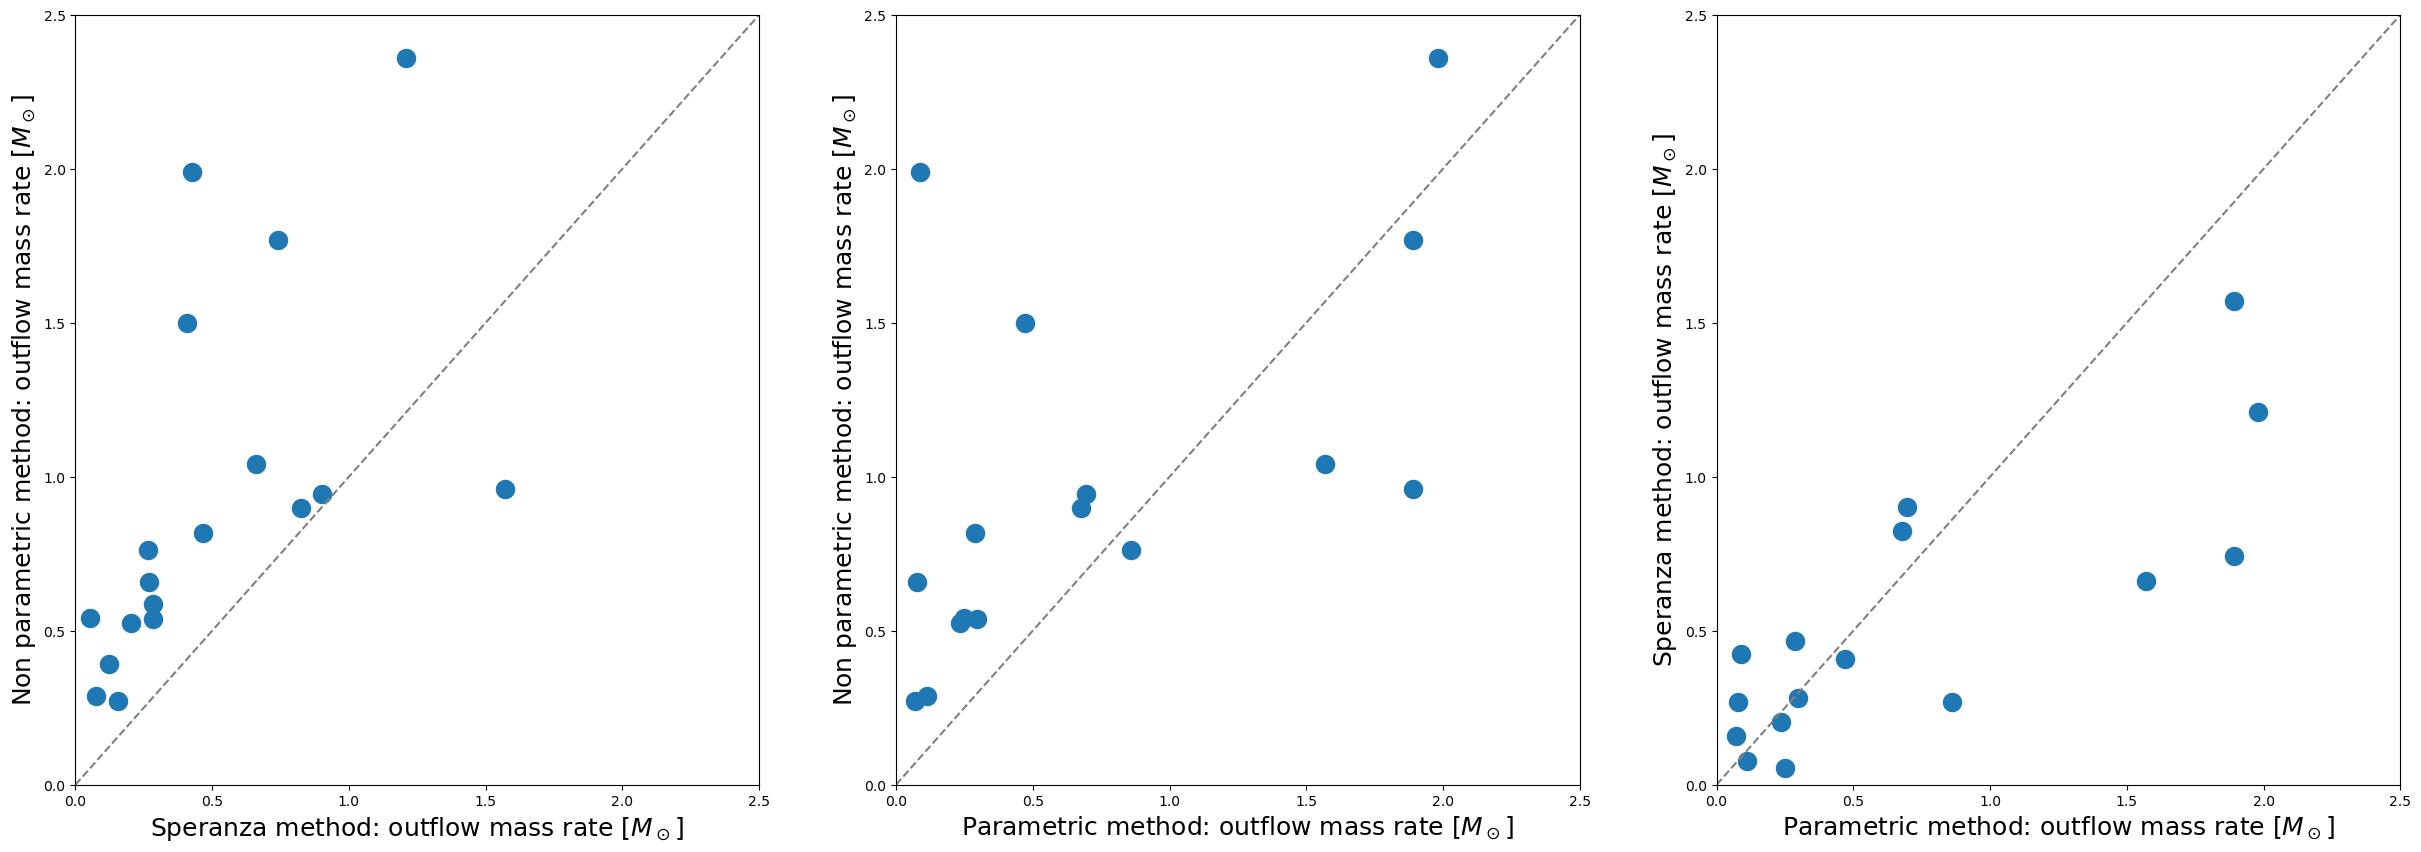

In [11]:
f,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,10))
ax1.scatter(speranza['M.of'],nonpar['M.of'],linewidths=8)
ax1.plot([0,3],[0,3],linestyle='--',color='gray')
ax1.set_xlim(0,2.5)
ax1.set_ylim(0,2.5)
ax1.set_xlabel(r'Speranza method: outflow mass rate [$M_\odot$]',fontsize=18)
ax1.set_ylabel(r'Non parametric method: outflow mass rate [$M_\odot$]',fontsize=18)

ax2.scatter(par['M.of'],aux_nonpar['M.of'],linewidths=8)
ax2.plot([0,3],[0,3],linestyle='--',color='gray')
ax2.set_xlim(0,2.5)
ax2.set_ylim(0,2.5)
ax2.set_xlabel(r'Parametric method: outflow mass rate [$M_\odot$]',fontsize=18)
ax2.set_ylabel(r'Non parametric method: outflow mass rate [$M_\odot$]',fontsize=18)

ax3.scatter(par['M.of'],aux_spe['M.of'],linewidths=8)
ax3.plot([0,3],[0,3],linestyle='--',color='gray')
ax3.set_xlim(0,2.5)
ax3.set_ylim(0,2.5)
ax3.set_xlabel(r'Parametric method: outflow mass rate [$M_\odot$]',fontsize=18)
ax3.set_ylabel(r'Speranza method: outflow mass rate [$M_\odot$]',fontsize=18)

We can observe that the two methods that present a higher agreement for the outflow mass rate results are the Speranza et al. 2022 methods and the parametric one. On the other hand, the non parametric method can be considered to overestimate the values, in comparisson with both the other methods.